In [12]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import keras

In [13]:
train=pd.read_csv('sign_mnist_train.csv')
test=pd.read_csv('sign_mnist_test.csv')

In [14]:
x_train=train.iloc[:,1:]
y_train=train.iloc[:,0]
x_test=test.iloc[:,1:]
y_test=test.iloc[:,0]

In [6]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

ModuleNotFoundError: No module named 'tensorflow'

In [15]:
x_train=x_train.values.reshape(-1, 28, 28, 1)
x_test=x_test.values.reshape(-1, 28, 28, 1)

In [16]:
train.count()

label       27455
pixel1      27455
pixel2      27455
pixel3      27455
pixel4      27455
            ...  
pixel780    27455
pixel781    27455
pixel782    27455
pixel783    27455
pixel784    27455
Length: 785, dtype: int64

In [20]:
import seaborn as sns
graph=sns.countplot(x=train["label"])
graph.set(xlabel='Label', ylabel='Count')

ModuleNotFoundError: No module named 'seaborn'

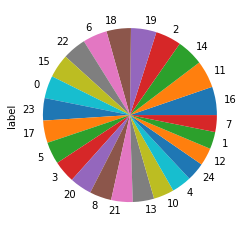

In [31]:
train['label'].value_counts().plot(kind='pie')

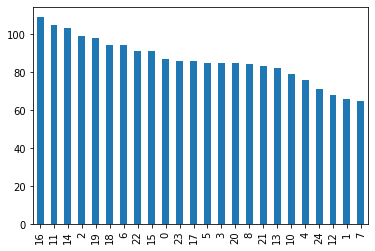

In [15]:
train['label'].value_counts().plot(kind='bar')

In [9]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [17]:
test.count()

label       2070
pixel1      2070
pixel2      2070
pixel3      2070
pixel4      2070
            ... 
pixel780    2069
pixel781    2069
pixel782    2069
pixel783    2069
pixel784    2069
Length: 785, dtype: int64

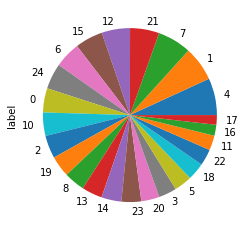

In [23]:
test['label'].value_counts().plot(kind='pie')

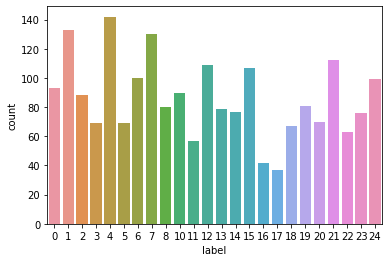

In [29]:
import seaborn as sns
sns.countplot(x=test["label"])

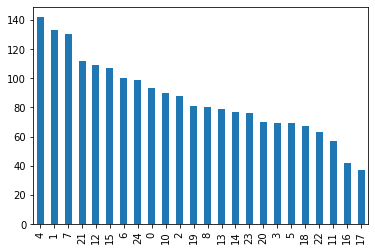

In [19]:
test['label'].value_counts().plot(kind='bar')

In [20]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,5,126,128,131,132,133,134,135,135,136,...,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,10,85,88,92,96,105,123,135,143,147,...,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,0,203,205,207,206,207,209,210,209,210,...,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,3,188,191,193,195,199,201,202,203,203,...,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


In [21]:
learning_rate=keras.callbacks.ReduceLROnPlateau(monitor='accuracy',factor=0.1,patience=2,min_lr=0.0001)

In [38]:
model = keras.models.Sequential()

In [39]:
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
model.add(Conv2D(75, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding= 'same'))
model.add(Conv2D(50, (3,3), strides = 1, padding= 'same', activation = 'relu'))
model.add(Dropout (0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(25, (3,3), strides = 1, padding= 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding= 'same'))
model.add(Flatten())
model.add(Dense (units = 512, activation = 'relu'))
model.add(Dropout (0.3))
model.add(Dense (units = 25, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
import traceback
import cv2
import numpy as np
import math

In [45]:
cap=cv2.VideoCapture (0)
letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
while True:
  ret, frame=cap.read()
  frame=cv2.flip(frame,1)
  #roi=frame[0:300 , 0:300]
  cv2.rectangle(frame, (0,0), (300, 300), (0,255,0),2)
  resized=cv2.resize(roi, (28,28), interpolation=cv2.INTER_AREA) 
  resized=cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) 
  dadada=model.predict_classes (np.expand_dims (np.expand_dims (resized, axis=2),axis=0))[0] 
  cv2.putText(frame, letters [dadada], (200,200), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,122), 3) 
  cv2.imshow('frame', frame) 
  cv2.imshow('mask', resized) 
  if(cv2.waitKey(1) & 0xFF==ord('q')): 
    break
cap.release()
cv2.destroyAllWindows()

NameError: ignored